In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import plotly.express as px
import inspect
import time
import warnings
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
from sklearn.metrics import mean_absolute_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.ar_model import AutoReg
%matplotlib inline

##ARAMI Model

In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv('/content/hanoi-aqi-weather-data.csv')

# Convert 'Local Time' column to datetime object
df['Local Time'] = pd.to_datetime(df['Local Time'])

# Set 'Local Time' column as index
df.set_index('Local Time', inplace=True)

# Display the DataFrame
df  # Use df.head() to display the first few rows of the Data

,UTC Time,City,Country Code,Timezone,AQI,CO,NO2,O3,PM10,PM25,SO2,Clouds,Precipitation,Pressure,Relative Humidity,Temperature,UV Index,Wind Speed
Local Time,,,,,,,,,,,,,,,,,,
2023-06-08 00:00:00,2023-06-07T17:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,118,168.7,32.3,74.7,52.5,42.00,57.3,37,0.50,1004,87,29.3,0.0,1.33
2023-06-08 01:00:00,2023-06-07T18:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,115,169.8,32.0,66.0,51.3,41.00,64.0,50,1.00,1004,88,29.0,0.0,1.00
2023-06-08 02:00:00,2023-06-07T19:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,112,166.7,29.3,63.7,50.0,40.00,66.0,62,1.00,1003,89,28.9,0.0,0.66
2023-06-08 03:00:00,2023-06-07T20:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,121,163.6,26.7,61.3,53.8,43.00,68.0,75,0.50,1003,90,28.7,0.0,0.33
2023-06-08 04:00:00,2023-06-07T21:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,134,160.5,24.0,59.0,60.0,48.00,70.0,87,0.00,1003,92,28.6,0.0,1.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-07 20:00:00,2024-06-07T13:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,67,968.9,21.7,27.3,35.4,20.09,4.0,70,1.00,1003,89,28.2,0.0,2.00
2024-06-07 21:00:00,2024-06-07T14:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,55,957.0,19.4,29.1,23.9,14.10,4.0,66,1.75,1004,92,27.5,0.0,2.00
2024-06-07 22:00:00,2024-06-07T15:00:00,Hanoi,VN,Asia/Ho_Chi_Minh,49,1583.2,20.3,35.2,20.6,11.73,4.0,62,2.25,1004,95,26.7,0.0,2.00


In [3]:
df_pm25_hourly = df[['PM25']].copy()
df_pm25_daily = df_pm25_hourly.resample('D')['PM25'].agg('mean')
df_pm25 = df_pm25_daily
df_pm25

Local Time
2023-06-08    48.083333
2023-06-09    22.291667
2023-06-10    44.458333
2023-06-11    52.458333
2023-06-12    45.916667
                ...    
2024-06-04    32.680417
2024-06-05    16.065000
2024-06-06    17.753750
2024-06-07    41.708333
2024-06-08    13.800000
Freq: D, Name: PM25, Length: 367, dtype: float64

In [4]:
df_pm25.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 367 entries, 2023-06-08 to 2024-06-08
Freq: D
Series name: PM25
Non-Null Count  Dtype  
--------------  -----  
308 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [5]:
# Handle missing or infinite values in your time series
df_pm25 = df_pm25.replace([np.inf, -np.inf], np.nan).dropna()

# Perform ADF test
adf_result = adfuller(df_pm25)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

ADF Statistic: -3.6429410000958153
p-value: 0.0049912061942340635
Critical Values: {'1%': -3.4521175397304784, '5%': -2.8711265007266666, '10%': -2.571877823851692}


<Axes: title={'center': 'Hanoi PM2.5 Levels, Daily Data'}, xlabel='Date', ylabel='PM2.5 Level'>

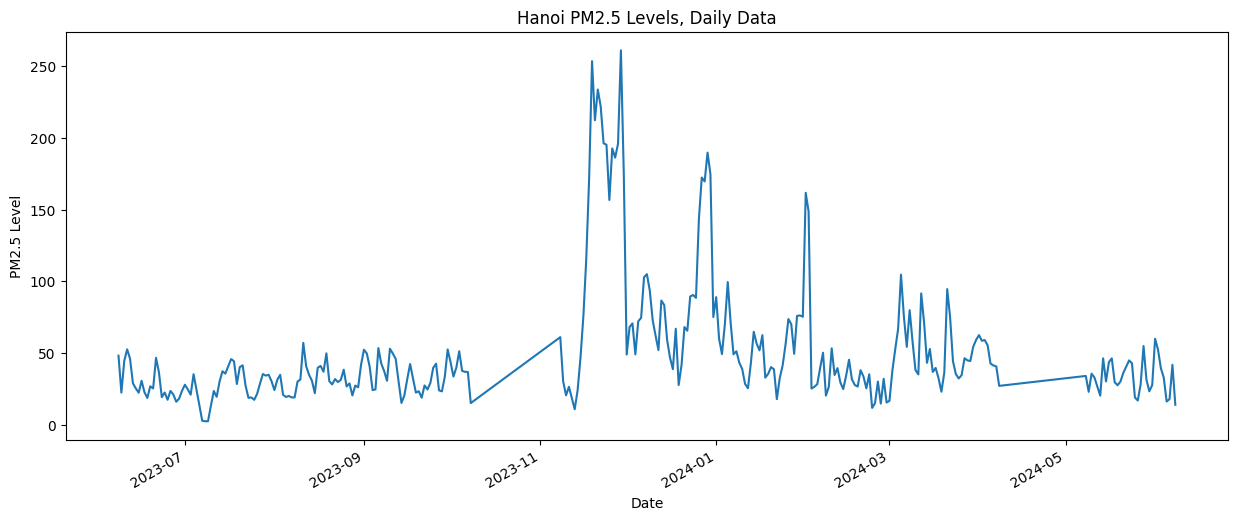

In [6]:
fig, ax = plt.subplots(figsize=(15, 6))
df_pm25.plot(xlabel = "Date",ylabel= "PM2.5 Level",
                           title= "Hanoi PM2.5 Levels, Daily Data", ax=ax)

Text(0.5, 1.0, 'Hanoi PM2.5 Readings, ACF')

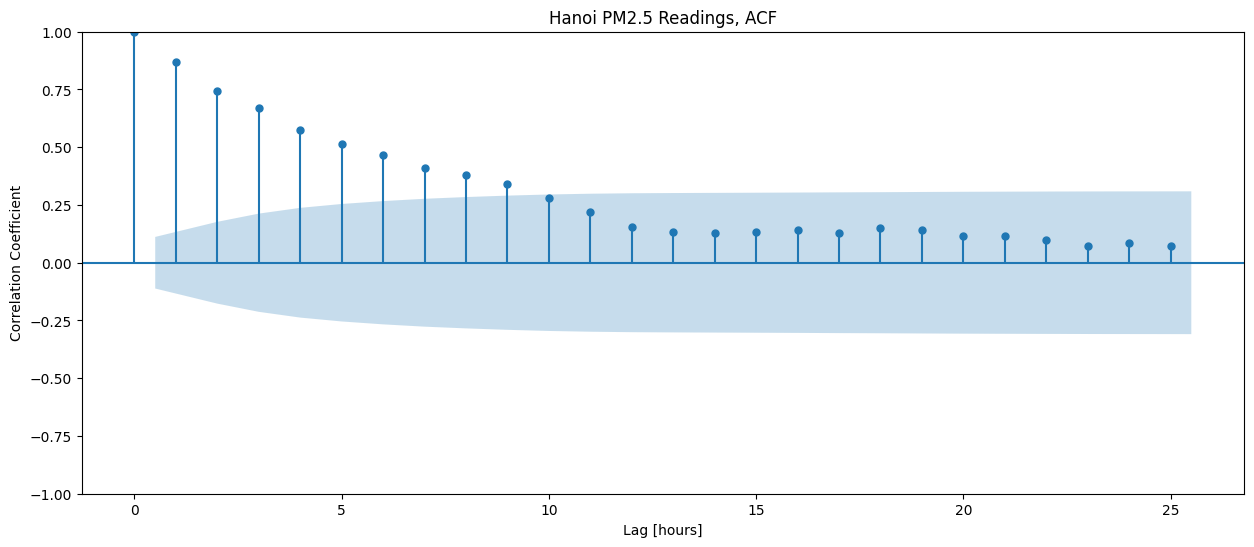

In [7]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_acf(df_pm25, ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient")
plt.title("Hanoi PM2.5 Readings, ACF")

Text(0.5, 1.0, 'Hanoi PM2.5 Readings, PACF')

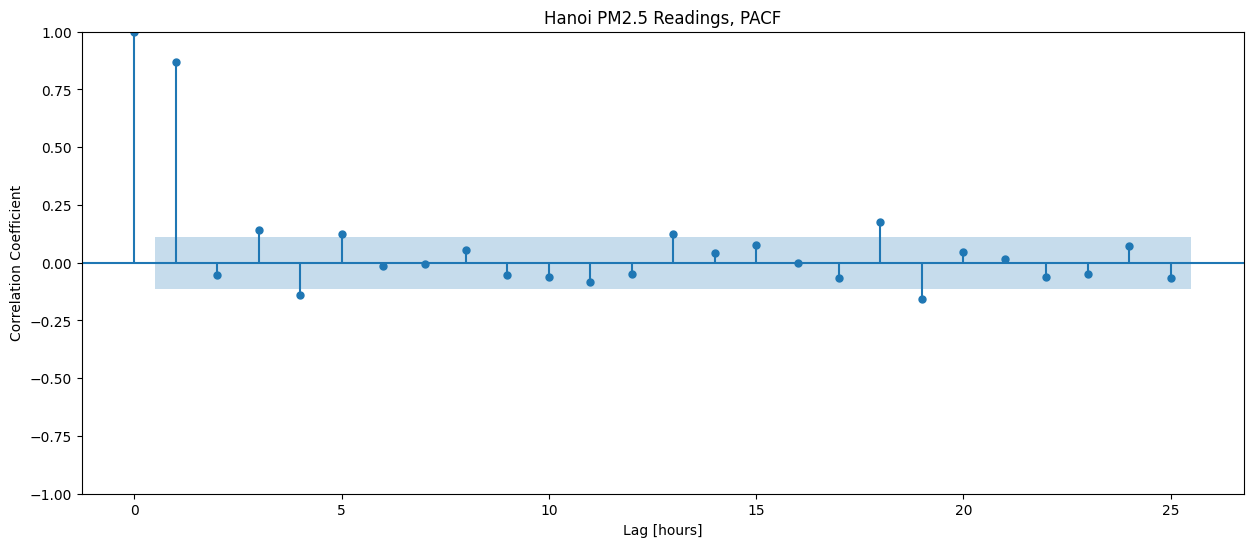

In [8]:
fig, ax = plt.subplots(figsize=(15, 6))
plot_pacf(df_pm25, ax=ax)
plt.xlabel("Lag [hours]")
plt.ylabel("Correlation Coefficient")
plt.title("Hanoi PM2.5 Readings, PACF")

In [9]:
int(len(df_pm25)) *0.8

246.4

In [10]:
cutoff_test = int(len(df_pm25)* 0.8)
df_pm25_train = df_pm25.iloc[:cutoff_test]
df_pm25_test = df_pm25.iloc[cutoff_test:]
print("df_pm25_train shape:", df_pm25_train.shape)
print("df_pm25_test shape:", df_pm25_test.shape)

df_pm25_train shape: (246,)
df_pm25_test shape: (62,)


In [11]:
# Perform ADF test
adf_result = adfuller(df_pm25_train)
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])
print('Critical Values:', adf_result[4])

ADF Statistic: -3.2308359147153314
p-value: 0.018267734948267993
Critical Values: {'1%': -3.4577787098622674, '5%': -2.873608704758507, '10%': -2.573201765981991}


In [12]:
df_pm25_train_mean = df_pm25_train.mean()
df_pm25_pred_baseline = [df_pm25_train_mean]*len(df_pm25_train)
mae_baseline = mean_absolute_error(df_pm25_train, df_pm25_pred_baseline)

print("Mean P2 Reading:", round(df_pm25_train_mean, 2))
print("Baseline MAE:", round(mae_baseline, 2))

Mean P2 Reading: 52.14
Baseline MAE: 30.66


In [13]:
p_params = range(0, 8, 1)
q_params = range(0, 3, 1)
list(p_params)

[0, 1, 2, 3, 4, 5, 6, 7]

In [14]:
# Create dictionary to store MAEs
mae_grid = dict()
# Outer loop: Iterate through possible values for `p`
for p in p_params:
    # Create key-value pair in dict. Key is `p`, value is empty list.
    mae_grid[p] = list()
    # Inner loop: Iterate through possible values for `q`
    for q in q_params:
        # Combination of hyperparameters for model
        order = (p, 1, q)
        # Note start time
        start_time = time.time()
        # Train model
        model = ARIMA(df_pm25_train, order=order).fit()
        # Calculate model training time
        elapsed_time = round(time.time() - start_time, 2)
        print(f"Trained ARIMA {order} in {elapsed_time} seconds.")
        # Generate in-sample (training) predictions
        df_pm25_pred = model.predict()
        # Calculate training MAE
        mae = mean_absolute_error(df_pm25_train, df_pm25_pred)
        # Append MAE to list in dictionary
        mae_grid[p].append(mae)

print()
print(mae_grid)

Trained ARIMA (0, 1, 0) in 0.08 seconds.
Trained ARIMA (0, 1, 1) in 0.05 seconds.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (0, 1, 2) in 0.08 seconds.
Trained ARIMA (1, 1, 0) in 0.03 seconds.
Trained ARIMA (1, 1, 1) in 0.09 seconds.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (1, 1, 2) in 0.14 seconds.
Trained ARIMA (2, 1, 0) in 0.08 seconds.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (2, 1, 1) in 0.14 seconds.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (2, 1, 2) in 0.45 seconds.
Trained ARIMA (3, 1, 0) in 0.1 seconds.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (3, 1, 1) in 0.19 seconds.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (3, 1, 2) in 0.48 seconds.
Trained ARIMA (4, 1, 0) in 0.11 seconds.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (4, 1, 1) in 0.21 seconds.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (4, 1, 2) in 0.63 seconds.
Trained ARIMA (5, 1, 0) in 0.14 seconds.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (5, 1, 1) in 0.19 seconds.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (5, 1, 2) in 0.97 seconds.
Trained ARIMA (6, 1, 0) in 0.17 seconds.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (6, 1, 1) in 0.89 seconds.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (6, 1, 2) in 1.12 seconds.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (7, 1, 0) in 0.23 seconds.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (7, 1, 1) in 0.32 seconds.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Trained ARIMA (7, 1, 2) in 0.5 seconds.

{0: [14.389456300813013, 14.406754144071485, 14.38889638614922], 1: [14.400459966691695, 14.4552157596698, 14.216764716001812], 2: [14.298150375624237, 14.225683134360006, 14.143525200832928], 3: [14.355645290495257, 14.20683767610231, 13.806421936516072], 4: [14.085302113370245, 14.08918993527603, 13.797595603938072], 5: [14.087442991656658, 14.086281493787741, 13.746219212433065], 6: [14.069119653754022, 13.750770298188174, 13.75149356194712], 7: [13.971364715541265, 13.972633663302542, 13.97327525131344]}


In [15]:
mae_df = pd.DataFrame(mae_grid)
mae_df.round(4)

,0,1,2,3,4,5,6,7
0,14.3895,14.4005,14.2982,14.3556,14.0853,14.0874,14.0691,13.9714
1,14.4068,14.4552,14.2257,14.2068,14.0892,14.0863,13.7508,13.9726
2,14.3889,14.2168,14.1435,13.8064,13.7976,13.7462,13.7515,13.9733


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


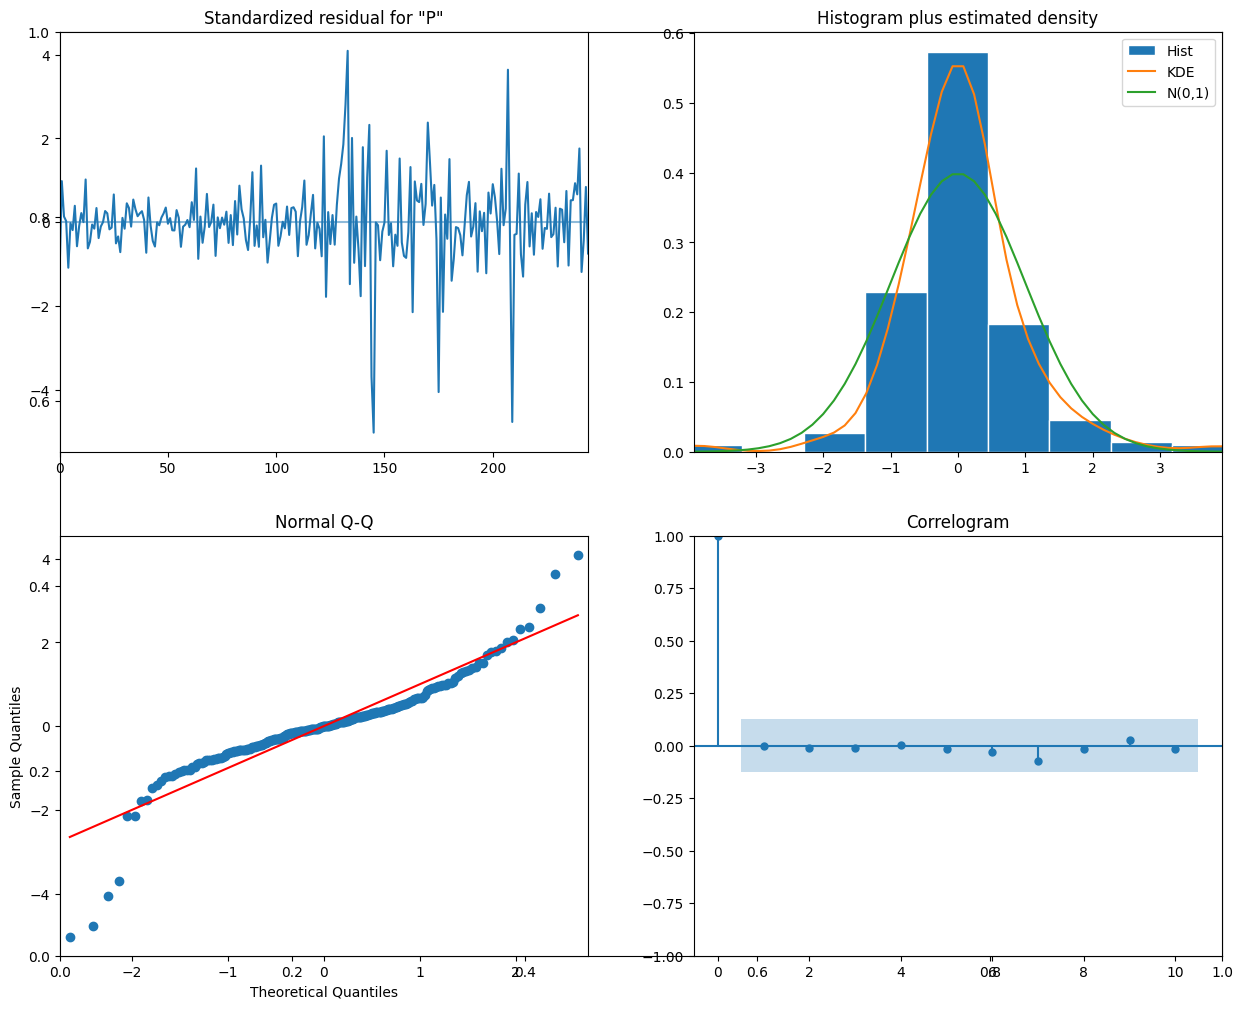

In [16]:
model = ARIMA(df_pm25_train, order=(5,1,1))
results = model.fit()
fig, ax = plt.subplots(figsize=(15, 12))
results.plot_diagnostics(fig=fig)
# Save the plot as an image file (e.g., PNG)
plt.savefig('example_plot.png')

In [17]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Assuming df_pm25_train and df_pm25_test are already defined and split

# Initialize df_pm25_pred_wfv as an empty Series with the same index as df_pm25_test
df_pm25_pred_wfv = pd.Series(index=df_pm25_test.index, dtype='float64')

# Copy df_pm25_train to history
history = df_pm25_train.copy()

# Iterate over the length of df_pm25_test to make predictions
for i in range(len(df_pm25_test)):
    # Fit the ARIMA model
    model = ARIMA(history, order=(5, 1, 1)).fit()

    # Forecast the next value
    next_pred = model.forecast(steps=1)

    # Assign the forecasted value to the corresponding index in df_pm25_pred_wfv
    df_pm25_pred_wfv.iloc[i] = next_pred.iloc[0]

    # Update history with the next actual value from df_pm25_test
    history = pd.concat([history, df_pm25_test.iloc[[i]]])

# Round the entire Series to 2 decimals
df_pm25_pred_wfv = df_pm25_pred_wfv.round(2)

# Now df_pm25_pred_wfv should contain the walk-forward validation predictions
print(df_pm25_pred_wfv)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

Local Time
2024-03-10    54.33
2024-03-11    49.03
2024-03-12    31.08
2024-03-13    94.52
2024-03-14    60.01
              ...  
2024-06-04    44.55
2024-06-05    31.21
2024-06-06    18.63
2024-06-07    25.18
2024-06-08    43.08
Length: 62, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [18]:
print(df_pm25_pred_wfv.to_string(float_format='%.2f'))

Local Time
2024-03-10   54.33
2024-03-11   49.03
2024-03-12   31.08
2024-03-13   94.52
2024-03-14   60.01
2024-03-15   54.71
2024-03-16   47.31
2024-03-17   33.39
2024-03-18   49.66
2024-03-19   29.14
2024-03-20   28.93
2024-03-21   39.28
2024-03-22   93.65
2024-03-23   63.94
2024-03-24   53.01
2024-03-25   30.32
2024-03-26   33.65
2024-03-27   40.20
2024-03-28   48.42
2024-03-29   43.99
2024-03-30   46.78
2024-03-31   53.11
2024-04-01   57.08
2024-04-02   62.32
2024-04-03   56.08
2024-04-04   58.79
2024-04-05   53.49
2024-04-06   43.51
2024-04-07   43.97
2024-04-08   40.46
2024-05-08   29.95
2024-05-09   39.09
2024-05-10   21.45
2024-05-11   43.51
2024-05-12   29.50
2024-05-13   32.38
2024-05-14   21.76
2024-05-15   49.82
2024-05-16   26.00
2024-05-17   53.22
2024-05-18   38.60
2024-05-19   34.06
2024-05-20   31.22
2024-05-21   29.95
2024-05-22   39.79
2024-05-23   41.51
2024-05-24   45.59
2024-05-25   42.42
2024-05-26   20.48
2024-05-27   23.48
2024-05-28   28.78
2024-05-29   57.85
2

In [19]:
test_mae = mean_absolute_error(df_pm25_test, df_pm25_pred_wfv)
print("Test MAE (walk forward validation):", round(test_mae, 2))

Test MAE (walk forward validation): 12.0


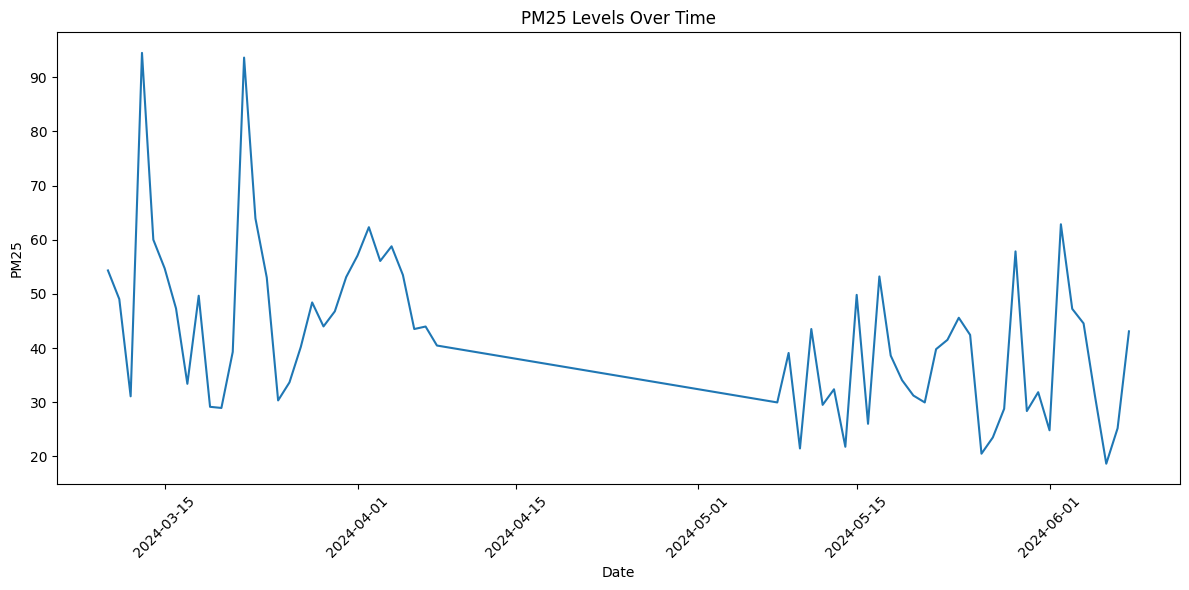

In [20]:
# Plotting with seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=df_pm25_pred_wfv.index, y=df_pm25_pred_wfv.values)
plt.title('PM25 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('PM25')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


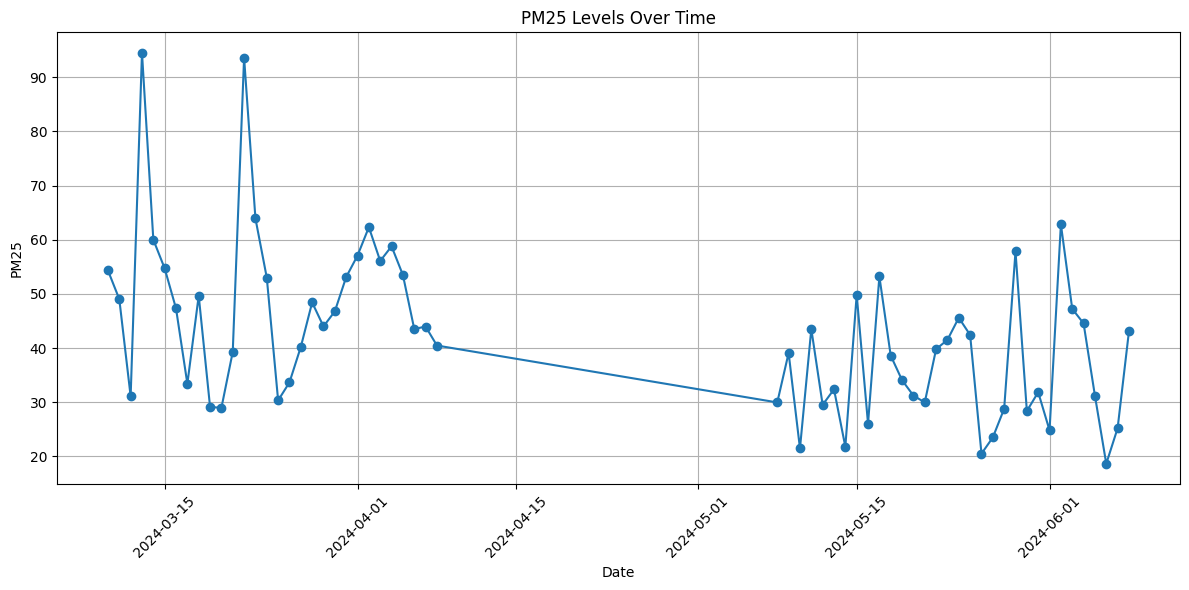

In [21]:
# Plotting with matplotlib
plt.figure(figsize=(12, 6))
plt.plot(df_pm25_pred_wfv.index, df_pm25_pred_wfv.values, marker='o', linestyle='-')
plt.title('PM25 Levels Over Time')
plt.xlabel('Date')
plt.ylabel('PM25')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

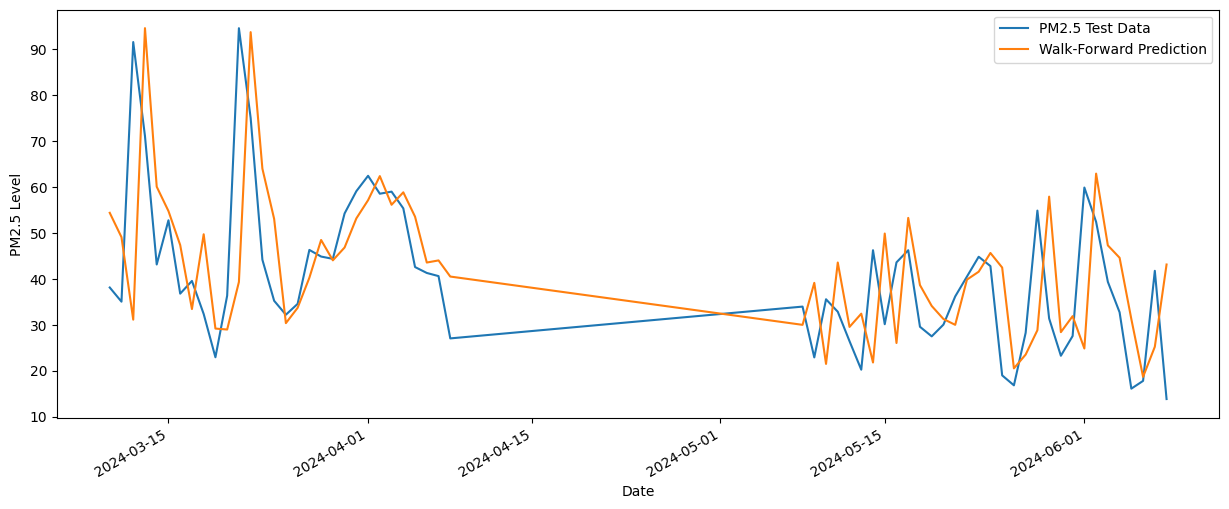

In [22]:
ax = df_pm25_test.plot(label = 'PM2.5 Test Data', figsize=(15, 6))
df_pm25_pred_wfv.plot(ax=ax, label='Walk-Forward Prediction')
plt.ylabel('PM2.5 Level')
plt.xlabel('Date')
plt.legend()
plt.show()

In [24]:
#show performance
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(df_pm25_test, df_pm25_pred_wfv)
mse = mean_squared_error(df_pm25_test, df_pm25_pred_wfv)
rmse = np.sqrt(mse)
r2 = r2_score(df_pm25_test, df_pm25_pred_wfv)
print('MAE:', round(mae, 2))
print('MSE:', round(mse, 2))
print('RMSE:', round(rmse, 2))
print('R2:', round(r2, 2))

MAE: 12.0
MSE: 279.43
RMSE: 16.72
R2: -0.05
